# Introduction to Machine Learning with Football Players

This notebook is an introduction to machine learning applied on [this](https://github.com/loistal/ADA_labs/blob/master/04%20-%20Applied%20ML/DATA.md) dataset.

The goal is to be able to predict the skin color of a player, using supervised and unsupervised techniques.

## Data Pre-Processing

First, we need to work on the data to clean it and get it ready for the learning part.

We use [this](http://nbviewer.jupyter.org/github/mathewzilla/redcard/blob/master/Crowdstorming_visualisation.ipynb) notebook to help us achieving this task.

In [3]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Display plots inline
%matplotlib inline 

### First Look
Let's import the data and take a look at it : 

In [48]:
filename = 'CrowdstormingDataJuly1st.csv'

# Create dataframe from the CSV file
df = pd.read_csv(filename)

print('Shape : {}.'.format(df.shape))
df.head(5)

Shape : (146028, 28).


,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


As explained in the data description, each row of the dataset is a dyad, which means that each row represents data for a given player under a given referee, with additional data about the player and the referee themselves.

From the `rater2` column above, some values are missing, which means there is no pictures. Given we base our analysis on the skin color, the row without picture or raters don't contain any information about the skin color, we choose to drop them.

In [50]:
print('{} % of the pictures are missing.'.format(df.photoID.isnull().sum() / len(df.photoID)))

# Drop the null rows
df = df[df.photoID.notnull()]

df.head(5)

0.14659517352836443 % of the pictures are missing.


,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,...,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,...,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,...,1.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752


### Player - Referee interaction analysis
Let's look at some attributes in more detail to improve our understanding of the player-referee interactions.

** How many time does a player meet the same referee ? **

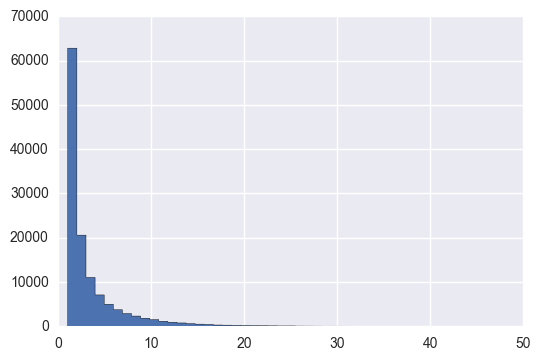

1     62799
2     20579
3     11028
4      7078
5      4979
6      3721
7      2875
8      2306
9      1819
10     1499
11     1137
12      921
13      749
14      596
15      483
16      406
17      287
18      252
19      204
20      158
21      135
22      114
23       95
25       76
24       76
26       48
27       39
28       31
30       24
29       21
31       18
32       17
33       10
34        9
37        7
35        5
36        4
41        4
40        3
44        2
38        2
39        2
46        1
42        1
47        1
Name: games, dtype: int64

In [61]:
fig, ax = plt.subplots()
ax.hist(df.games, bins=max(df.games), histtype = 'stepfilled')
plt.show()

df.games.value_counts()

# >>>> DO WE NEED TO DISAGREGGATE DATA ?? THINK ABOUT IT, CAUSE ABOVE HISTOGRAM IS NOT THE SAME<<<<<

### Major Glitch
Our helper notebook reports a major flaw in the dataset : it contains more information than it should. Let's look into this : 